In [ ]:
#NEW 

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
df = pd.read_csv("final_double_hand_v2.csv", index_col = 0)

In [4]:
set(df['Sign']),len(set(df['Sign']))

({'A',
  'B',
  'D',
  'E',
  'F',
  'G',
  'H',
  'J',
  'K',
  'M',
  'N',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'W',
  'X',
  'Y',
  'Z'},
 20)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Sign'])
df['Sign'] = le.transform(df['Sign'])

In [9]:
df.head()

,Left_WRIST_TO_THUMB_MCP,Right_WRIST_TO_THUMB_MCP,Left_WRIST_TO_THUMB_IP,Right_WRIST_TO_THUMB_IP,Left_WRIST_TO_THUMB_TIP,Right_WRIST_TO_THUMB_TIP,Left_WRIST_TO_INDEX_FINGER_PIP,Right_WRIST_TO_INDEX_FINGER_PIP,Left_WRIST_TO_INDEX_FINGER_DIP,Right_WRIST_TO_INDEX_FINGER_DIP,...,Right_THUMB_TIP_TO_RING_FINGER_TIP,Left_THUMB_TIP_TO_PINKY_MCP,Right_THUMB_TIP_TO_PINKY_MCP,Left_THUMB_TIP_TO_PINKY_PIP,Right_THUMB_TIP_TO_PINKY_PIP,Left_THUMB_TIP_TO_PINKY_DIP,Right_THUMB_TIP_TO_PINKY_DIP,Left_THUMB_TIP_TO_PINKY_TIP,Right_THUMB_TIP_TO_PINKY_TIP,Sign
0,0.099008,0.127603,0.116901,0.179078,0.140162,0.220722,0.221773,0.275529,0.261875,0.324983,...,0.051515,0.045673,0.097457,0.034473,0.056609,0.007751,0.053097,0.036408,0.078769,4
1,0.095642,0.132970,0.111196,0.184561,0.126507,0.229715,0.221784,0.280433,0.260399,0.326364,...,0.064180,0.047771,0.104017,0.052105,0.067718,0.015183,0.062861,0.024662,0.083959,4
2,0.098191,0.127092,0.115833,0.178321,0.129115,0.225543,0.219817,0.285789,0.256921,0.342458,...,0.060254,0.043410,0.103969,0.045377,0.064365,0.008922,0.061538,0.028096,0.085139,4
3,0.076017,0.091492,0.092463,0.128655,0.110633,0.161933,0.172424,0.195608,0.204136,0.228476,...,0.038510,0.041996,0.076208,0.028471,0.047476,0.009452,0.038940,0.029288,0.052266,4
4,0.082102,0.093787,0.098021,0.132155,0.118013,0.164409,0.197616,0.209749,0.234092,0.240906,...,0.031817,0.056414,0.068255,0.032875,0.042104,0.022666,0.031062,0.043828,0.052969,4


In [30]:
sgn = np.array(['A',
  'B',
  'D',
  'E',
  'F',
  'G',
  'H',
  'J',
  'K',
  'M',
  'N',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'W',
  'X',
  'Y',
  'Z'])
le.transform(sgn)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
X = df.drop(columns = ['Sign'])
y = df['Sign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3, shuffle=True)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
X[:1]

,Left_WRIST_TO_THUMB_MCP,Right_WRIST_TO_THUMB_MCP,Left_WRIST_TO_THUMB_IP,Right_WRIST_TO_THUMB_IP,Left_WRIST_TO_THUMB_TIP,Right_WRIST_TO_THUMB_TIP,Left_WRIST_TO_INDEX_FINGER_PIP,Right_WRIST_TO_INDEX_FINGER_PIP,Left_WRIST_TO_INDEX_FINGER_DIP,Right_WRIST_TO_INDEX_FINGER_DIP,...,Left_THUMB_TIP_TO_RING_FINGER_TIP,Right_THUMB_TIP_TO_RING_FINGER_TIP,Left_THUMB_TIP_TO_PINKY_MCP,Right_THUMB_TIP_TO_PINKY_MCP,Left_THUMB_TIP_TO_PINKY_PIP,Right_THUMB_TIP_TO_PINKY_PIP,Left_THUMB_TIP_TO_PINKY_DIP,Right_THUMB_TIP_TO_PINKY_DIP,Left_THUMB_TIP_TO_PINKY_TIP,Right_THUMB_TIP_TO_PINKY_TIP
0,0.099008,0.127603,0.116901,0.179078,0.140162,0.220722,0.221773,0.275529,0.261875,0.324983,...,0.037084,0.051515,0.045673,0.097457,0.034473,0.056609,0.007751,0.053097,0.036408,0.078769


In [33]:
X

,Left_WRIST_TO_THUMB_MCP,Right_WRIST_TO_THUMB_MCP,Left_WRIST_TO_THUMB_IP,Right_WRIST_TO_THUMB_IP,Left_WRIST_TO_THUMB_TIP,Right_WRIST_TO_THUMB_TIP,Left_WRIST_TO_INDEX_FINGER_PIP,Right_WRIST_TO_INDEX_FINGER_PIP,Left_WRIST_TO_INDEX_FINGER_DIP,Right_WRIST_TO_INDEX_FINGER_DIP,...,Left_THUMB_TIP_TO_RING_FINGER_TIP,Right_THUMB_TIP_TO_RING_FINGER_TIP,Left_THUMB_TIP_TO_PINKY_MCP,Right_THUMB_TIP_TO_PINKY_MCP,Left_THUMB_TIP_TO_PINKY_PIP,Right_THUMB_TIP_TO_PINKY_PIP,Left_THUMB_TIP_TO_PINKY_DIP,Right_THUMB_TIP_TO_PINKY_DIP,Left_THUMB_TIP_TO_PINKY_TIP,Right_THUMB_TIP_TO_PINKY_TIP
0,0.099008,0.127603,0.116901,0.179078,0.140162,0.220722,0.221773,0.275529,0.261875,0.324983,...,0.037084,0.051515,0.045673,0.097457,0.034473,0.056609,0.007751,0.053097,0.036408,0.078769
1,0.095642,0.132970,0.111196,0.184561,0.126507,0.229715,0.221784,0.280433,0.260399,0.326364,...,0.026780,0.064180,0.047771,0.104017,0.052105,0.067718,0.015183,0.062861,0.024662,0.083959
2,0.098191,0.127092,0.115833,0.178321,0.129115,0.225543,0.219817,0.285789,0.256921,0.342458,...,0.030627,0.060254,0.043410,0.103969,0.045377,0.064365,0.008922,0.061538,0.028096,0.085139
3,0.076017,0.091492,0.092463,0.128655,0.110633,0.161933,0.172424,0.195608,0.204136,0.228476,...,0.019382,0.038510,0.041996,0.076208,0.028471,0.047476,0.009452,0.038940,0.029288,0.052266
4,0.082102,0.093787,0.098021,0.132155,0.118013,0.164409,0.197616,0.209749,0.234092,0.240906,...,0.025094,0.031817,0.056414,0.068255,0.032875,0.042104,0.022666,0.031062,0.043828,0.052969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0.128949,0.106820,0.163808,0.142175,0.192905,0.169496,0.231050,0.177539,0.280476,0.186561,...,0.157509,0.047829,0.092028,0.087003,0.083196,0.052671,0.098846,0.047918,0.120845,0.053443
1152,0.128595,0.101958,0.172397,0.137993,0.206453,0.166094,0.236515,0.175946,0.286180,0.180705,...,0.140767,0.045613,0.108137,0.080892,0.080421,0.051415,0.083080,0.048881,0.099675,0.052401
1153,0.119289,0.107085,0.163037,0.141193,0.196848,0.165949,0.223182,0.179892,0.273459,0.178473,...,0.132302,0.047915,0.096059,0.071302,0.068893,0.044630,0.075566,0.050641,0.096044,0.057403
1154,0.131212,0.114865,0.174919,0.153629,0.207395,0.182819,0.239069,0.188240,0.290332,0.186401,...,0.137114,0.049823,0.113517,0.095578,0.080988,0.067388,0.082792,0.062783,0.098956,0.062033


In [34]:
# Set the random seed
tf.random.set_seed(42)


# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(150, activation="relu",input_shape = (None, 72)),
#   tf.keras.layers.Dense(130, activation="relu"),
  tf.keras.layers.Dense(120, activation="relu"),
#   tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(30, activation="relu"),
#   tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(20, activation="softmax")
])

# Compile the model with the ideal learning rate
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"]
              )

# fit the model
history = model.fit(X_train,y_train, epochs=1000, validation_data =(X_test,y_test))
# np.array(y_train).reshape((-1,42))

2022-06-01 01:02:53.810118: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
26/26 [==============================] - 1s 8ms/step - loss: 2.9374 - accuracy: 0.0865 - val_loss: 2.9059 - val_accuracy: 0.1239
Epoch 2/1000
26/26 [==============================] - 0s 2ms/step - loss: 2.7779 - accuracy: 0.1681 - val_loss: 2.7265 - val_accuracy: 0.1729
Epoch 3/1000
26/26 [==============================] - 0s 3ms/step - loss: 2.5033 - accuracy: 0.2905 - val_loss: 2.3950 - val_accuracy: 0.3458
Epoch 4/1000
26/26 [==============================] - 0s 3ms/step - loss: 2.1339 - accuracy: 0.4116 - val_loss: 1.9934 - val_accuracy: 0.3890
Epoch 5/1000
26/26 [==============================] - 0s 2ms/step - loss: 1.7349 - accuracy: 0.5019 - val_loss: 1.5566 - val_accuracy: 0.5850
Epoch 6/1000
26/26 [==============================] - 0s 3ms/step - loss: 1.3679 - accuracy: 0.6477 - val_loss: 1.2624 - val_accuracy: 0.6801
Epoch 7/1000
26/26 [==============================] - 0s 3ms/step - loss: 1.0995 - accuracy: 0.6984 - val_loss: 1.0755 - val_accuracy: 0.6715
Epoch 

26/26 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9901 - val_loss: 0.3074 - val_accuracy: 0.9366
Epoch 109/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9938 - val_loss: 0.3164 - val_accuracy: 0.9337
Epoch 110/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9901 - val_loss: 0.2940 - val_accuracy: 0.9424
Epoch 111/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9951 - val_loss: 0.2866 - val_accuracy: 0.9395
Epoch 112/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9951 - val_loss: 0.2816 - val_accuracy: 0.9337
Epoch 113/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9926 - val_loss: 0.3115 - val_accuracy: 0.9337
Epoch 114/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9839 - val_loss: 0.3512 - val_accuracy: 0.9078
Epoch 1

Epoch 165/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9975 - val_loss: 0.3226 - val_accuracy: 0.9337
Epoch 166/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.3238 - val_accuracy: 0.9481
Epoch 167/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9988 - val_loss: 0.3158 - val_accuracy: 0.9424
Epoch 168/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9988 - val_loss: 0.3330 - val_accuracy: 0.9366
Epoch 169/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9988 - val_loss: 0.3031 - val_accuracy: 0.9481
Epoch 170/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9988 - val_loss: 0.3608 - val_accuracy: 0.9280
Epoch 171/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9963 - val_loss: 0.2910 - val_accuracy:

Epoch 222/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.3121 - val_accuracy: 0.9510
Epoch 223/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3122 - val_accuracy: 0.9539
Epoch 224/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3246 - val_accuracy: 0.9424
Epoch 225/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3168 - val_accuracy: 0.9539
Epoch 226/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3157 - val_accuracy: 0.9510
Epoch 227/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3234 - val_accuracy: 0.9452
Epoch 228/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3223 - val_accuracy:

Epoch 279/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9963 - val_loss: 0.3381 - val_accuracy: 0.9510
Epoch 280/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9988 - val_loss: 0.3829 - val_accuracy: 0.9452
Epoch 281/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3460 - val_accuracy: 0.9539
Epoch 282/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3511 - val_accuracy: 0.9539
Epoch 283/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3505 - val_accuracy: 0.9539
Epoch 284/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3456 - val_accuracy: 0.9539
Epoch 285/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3481 - val_accuracy:

Epoch 336/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3466 - val_accuracy: 0.9510
Epoch 337/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3461 - val_accuracy: 0.9625
Epoch 338/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3477 - val_accuracy: 0.9510
Epoch 339/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3485 - val_accuracy: 0.9568
Epoch 340/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3444 - val_accuracy: 0.9597
Epoch 341/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3485 - val_accuracy: 0.9539
Epoch 342/1000
26/26 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3472 - val_accuracy:

26/26 [==============================] - 0s 2ms/step - loss: 8.6640e-04 - accuracy: 1.0000 - val_loss: 0.3943 - val_accuracy: 0.9597
Epoch 449/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4163 - val_accuracy: 0.9481
Epoch 450/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9802 - val_loss: 0.8342 - val_accuracy: 0.8674
Epoch 451/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.9345 - val_loss: 0.5040 - val_accuracy: 0.9222
Epoch 452/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.9679 - val_loss: 0.3339 - val_accuracy: 0.9481
Epoch 453/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.3858 - val_accuracy: 0.9539
Epoch 454/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9988 - val_loss: 0.3872 - val_accuracy: 0.9625
Epo

Epoch 560/1000
26/26 [==============================] - 0s 2ms/step - loss: 7.8340e-04 - accuracy: 1.0000 - val_loss: 0.3543 - val_accuracy: 0.9625
Epoch 561/1000
26/26 [==============================] - 0s 2ms/step - loss: 7.7399e-04 - accuracy: 1.0000 - val_loss: 0.3554 - val_accuracy: 0.9625
Epoch 562/1000
26/26 [==============================] - 0s 2ms/step - loss: 7.5737e-04 - accuracy: 1.0000 - val_loss: 0.3557 - val_accuracy: 0.9625
Epoch 563/1000
26/26 [==============================] - 0s 2ms/step - loss: 7.1831e-04 - accuracy: 1.0000 - val_loss: 0.3545 - val_accuracy: 0.9625
Epoch 564/1000
26/26 [==============================] - 0s 2ms/step - loss: 6.9564e-04 - accuracy: 1.0000 - val_loss: 0.3555 - val_accuracy: 0.9625
Epoch 565/1000
26/26 [==============================] - 0s 2ms/step - loss: 6.9685e-04 - accuracy: 1.0000 - val_loss: 0.3567 - val_accuracy: 0.9625
Epoch 566/1000
26/26 [==============================] - 0s 2ms/step - loss: 6.9246e-04 - accuracy: 1.0000 - val_

26/26 [==============================] - 0s 2ms/step - loss: 2.6083e-04 - accuracy: 1.0000 - val_loss: 0.3669 - val_accuracy: 0.9654
Epoch 671/1000
26/26 [==============================] - 0s 2ms/step - loss: 2.6279e-04 - accuracy: 1.0000 - val_loss: 0.3679 - val_accuracy: 0.9654
Epoch 672/1000
26/26 [==============================] - 0s 2ms/step - loss: 2.5454e-04 - accuracy: 1.0000 - val_loss: 0.3659 - val_accuracy: 0.9654
Epoch 673/1000
26/26 [==============================] - 0s 2ms/step - loss: 2.5845e-04 - accuracy: 1.0000 - val_loss: 0.3672 - val_accuracy: 0.9654
Epoch 674/1000
26/26 [==============================] - 0s 2ms/step - loss: 2.8391e-04 - accuracy: 1.0000 - val_loss: 0.3657 - val_accuracy: 0.9654
Epoch 675/1000
26/26 [==============================] - 0s 2ms/step - loss: 2.5509e-04 - accuracy: 1.0000 - val_loss: 0.3691 - val_accuracy: 0.9683
Epoch 676/1000
26/26 [==============================] - 0s 2ms/step - loss: 2.4508e-04 - accuracy: 1.0000 - val_loss: 0.3674 - 

Epoch 726/1000
26/26 [==============================] - 0s 2ms/step - loss: 5.4151e-04 - accuracy: 1.0000 - val_loss: 0.3630 - val_accuracy: 0.9683
Epoch 727/1000
26/26 [==============================] - 0s 2ms/step - loss: 5.2189e-04 - accuracy: 1.0000 - val_loss: 0.3631 - val_accuracy: 0.9683
Epoch 728/1000
26/26 [==============================] - 0s 2ms/step - loss: 5.0675e-04 - accuracy: 1.0000 - val_loss: 0.3637 - val_accuracy: 0.9683
Epoch 729/1000
26/26 [==============================] - 0s 2ms/step - loss: 4.9324e-04 - accuracy: 1.0000 - val_loss: 0.3643 - val_accuracy: 0.9683
Epoch 730/1000
26/26 [==============================] - 0s 2ms/step - loss: 4.8167e-04 - accuracy: 1.0000 - val_loss: 0.3653 - val_accuracy: 0.9683
Epoch 731/1000
26/26 [==============================] - 0s 2ms/step - loss: 4.7874e-04 - accuracy: 1.0000 - val_loss: 0.3647 - val_accuracy: 0.9683
Epoch 732/1000
26/26 [==============================] - 0s 2ms/step - loss: 4.6419e-04 - accuracy: 1.0000 - val_

26/26 [==============================] - 0s 2ms/step - loss: 1.4090e-04 - accuracy: 1.0000 - val_loss: 0.4073 - val_accuracy: 0.9625
Epoch 837/1000
26/26 [==============================] - 0s 2ms/step - loss: 1.4606e-04 - accuracy: 1.0000 - val_loss: 0.4069 - val_accuracy: 0.9597
Epoch 838/1000
26/26 [==============================] - 0s 2ms/step - loss: 1.4642e-04 - accuracy: 1.0000 - val_loss: 0.4088 - val_accuracy: 0.9625
Epoch 839/1000
26/26 [==============================] - 0s 2ms/step - loss: 1.4154e-04 - accuracy: 1.0000 - val_loss: 0.4071 - val_accuracy: 0.9625
Epoch 840/1000
26/26 [==============================] - 0s 2ms/step - loss: 1.3305e-04 - accuracy: 1.0000 - val_loss: 0.4093 - val_accuracy: 0.9597
Epoch 841/1000
26/26 [==============================] - 0s 2ms/step - loss: 1.3906e-04 - accuracy: 1.0000 - val_loss: 0.4084 - val_accuracy: 0.9597
Epoch 842/1000
26/26 [==============================] - 0s 2ms/step - loss: 1.3409e-04 - accuracy: 1.0000 - val_loss: 0.4098 - 

Epoch 892/1000
26/26 [==============================] - 0s 2ms/step - loss: 4.2448e-04 - accuracy: 1.0000 - val_loss: 0.4029 - val_accuracy: 0.9625
Epoch 893/1000
26/26 [==============================] - 0s 2ms/step - loss: 4.1606e-04 - accuracy: 1.0000 - val_loss: 0.4044 - val_accuracy: 0.9625
Epoch 894/1000
26/26 [==============================] - 0s 2ms/step - loss: 4.1343e-04 - accuracy: 1.0000 - val_loss: 0.4050 - val_accuracy: 0.9625
Epoch 895/1000
26/26 [==============================] - 0s 2ms/step - loss: 4.0796e-04 - accuracy: 1.0000 - val_loss: 0.4039 - val_accuracy: 0.9625
Epoch 896/1000
26/26 [==============================] - 0s 2ms/step - loss: 4.1801e-04 - accuracy: 1.0000 - val_loss: 0.4050 - val_accuracy: 0.9625
Epoch 897/1000
26/26 [==============================] - 0s 2ms/step - loss: 3.9167e-04 - accuracy: 1.0000 - val_loss: 0.4075 - val_accuracy: 0.9597
Epoch 898/1000
26/26 [==============================] - 0s 2ms/step - loss: 4.0103e-04 - accuracy: 1.0000 - val_

In [41]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

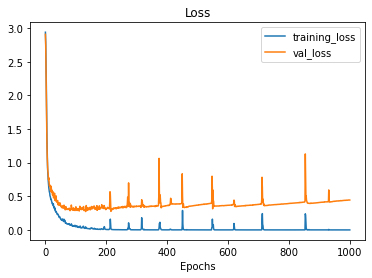

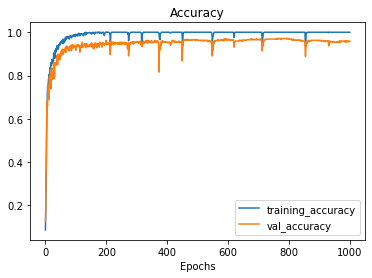

In [42]:
plot_loss_curves(history)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
y_pred = model.predict(X_test)

In [62]:
d = ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'W', 'X', 'Y', 'Z']
ans_pred = []
for i in y_pred:
    ans_pred.append(d[i.argmax()])
y_test_ans = []
for i in y_test:
    y_test_ans.append(d[i.argmax()])

In [75]:
df = pd.DataFrame(confusion_matrix(y_test_ans,ans_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,1,0,1,1,0
9,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0


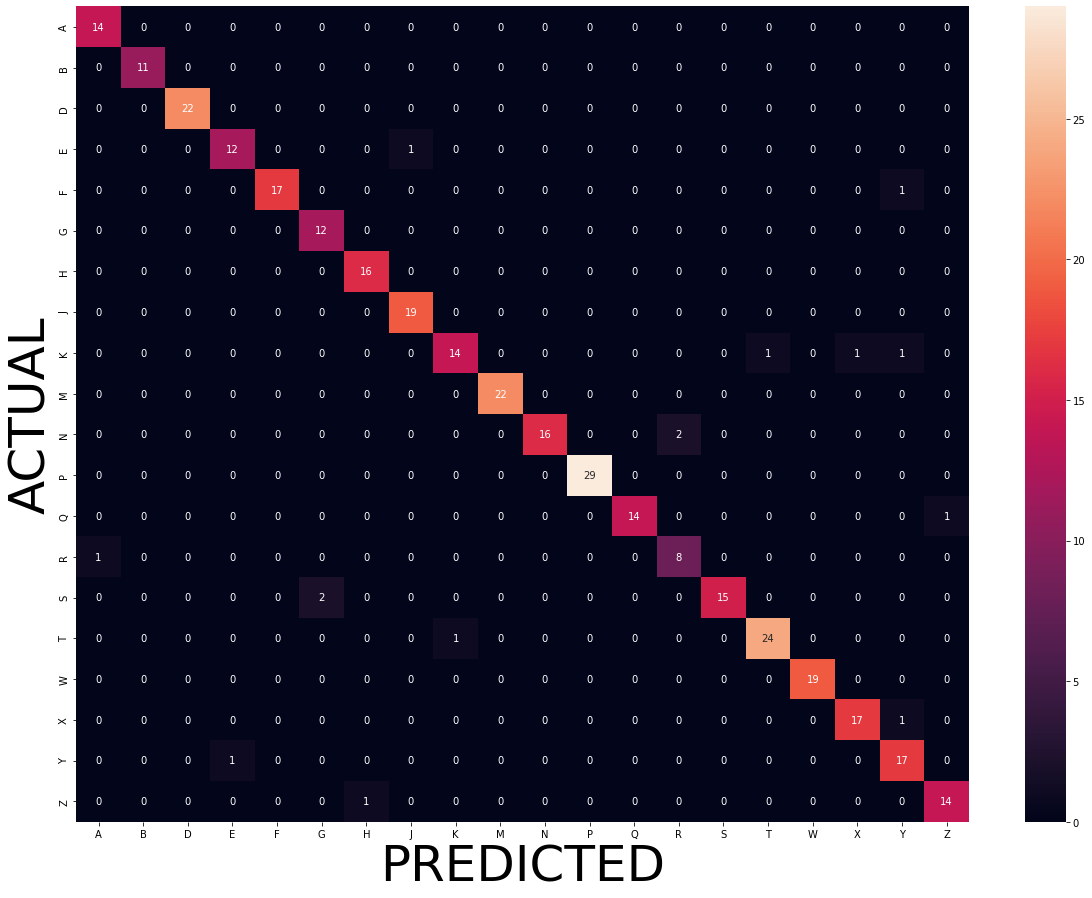

In [99]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,15))
df = pd.DataFrame(confusion_matrix(y_test_ans,ans_pred))


s=sn.heatmap(df,annot = True,xticklabels=d, yticklabels=d)
s.set_xlabel('PREDICTED', fontsize=50)
s.set_ylabel('ACTUAL', fontsize=50)
plt.show()

In [43]:
model.save("final_double_hand_alphabetv2.h5")